# Importing libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from collections import OrderedDict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.preprocessing import StandardScaler


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



# Reading Dataset

In [106]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Id = test["Id"]

X_test = test.drop(["Id"], axis=1)


# Having a look at Data and its structure 

In [107]:
df.shape, df.size

((450, 13), 5850)

In [108]:
df.head(3)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0


In [109]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,450.00,450.00,450.00,450.00,450.00,450.00,450.00,450.00,450.00,450.00,450.00
mean,4.64,4.31,90.71,112.55,548.04,9.13,19.02,44.58,4.05,0.02,10.15
std,2.34,1.23,5.49,66.10,249.39,4.65,5.86,16.25,1.75,0.32,43.30
min,1.00,2.00,18.70,1.10,7.90,0.00,2.20,15.00,0.90,0.00,0.00
25%,3.00,4.00,90.20,68.88,438.50,6.50,15.70,33.00,2.70,0.00,0.00
50%,4.00,4.00,91.60,108.15,658.20,8.40,19.40,42.00,4.00,0.00,0.52
75%,7.00,5.00,92.90,142.40,715.10,10.95,22.87,54.00,4.90,0.00,6.35
max,9.00,9.00,96.20,291.30,860.60,56.10,33.30,100.00,9.40,6.40,746.28


huge difference between max values of features!

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
X        450 non-null int64
Y        450 non-null int64
month    450 non-null object
day      450 non-null object
FFMC     450 non-null float64
DMC      450 non-null float64
DC       450 non-null float64
ISI      450 non-null float64
temp     450 non-null float64
RH       450 non-null int64
wind     450 non-null float64
rain     450 non-null float64
area     450 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 45.8+ KB


In [111]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 12 columns):
X        67 non-null int64
Y        67 non-null int64
month    67 non-null object
day      67 non-null object
FFMC     67 non-null float64
DMC      67 non-null float64
DC       67 non-null float64
ISI      67 non-null float64
temp     67 non-null float64
RH       67 non-null int64
wind     67 non-null float64
rain     67 non-null int64
dtypes: float64(6), int64(4), object(2)
memory usage: 6.4+ KB


In [112]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

#### Checking categorical data and numeric Data

In [113]:
categorical_features = df.select_dtypes(include=[np.object])
print("Categorical_features  : ",categorical_features.columns.size)
print("Categorical_features : ",categorical_features.columns)



numeric_features = df.select_dtypes(include=[np.number])
print("Numeric_features : ",numeric_features.columns.size)
print("Numeric_features : ",numeric_features.columns)

Categorical_features  :  2
Categorical_features :  Index(['month', 'day'], dtype='object')
Numeric_features :  11
Numeric_features :  Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area'],
      dtype='object')


In [114]:
print("X_test shape : ", X_test.shape)
print("X_test columns : ", X_test.columns)

X_test shape :  (67, 12)
X_test columns :  Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain'],
      dtype='object')


In [115]:
X_test.head(3)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0
1,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0
2,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0


# Checking for NAs

In [116]:
#missing data in Training set
pd.set_option('precision', 6)
null_values_per_col =  df.isnull().sum().sort_values(ascending = False)
percent = ( df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([null_values_per_col, percent.astype(float)], axis = 1, keys =["Total", "Percent"])
print(missing_data.head(20)) 

       Total  Percent
area       0      0.0
rain       0      0.0
wind       0      0.0
RH         0      0.0
temp       0      0.0
ISI        0      0.0
DC         0      0.0
DMC        0      0.0
FFMC       0      0.0
day        0      0.0
month      0      0.0
Y          0      0.0
X          0      0.0


In [117]:
#missing data in Testing set
pd.set_option('precision', 6)
null_values_per_col =  X_test.isnull().sum().sort_values(ascending = False)
percent = ( X_test.isnull().sum()/X_test.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([null_values_per_col, percent.astype(float)], axis = 1, keys =["Total", "Percent"])
print(missing_data.head(20)) 

       Total  Percent
rain       0      0.0
wind       0      0.0
RH         0      0.0
temp       0      0.0
ISI        0      0.0
DC         0      0.0
DMC        0      0.0
FFMC       0      0.0
day        0      0.0
month      0      0.0
Y          0      0.0
X          0      0.0


# Checking out  `AREA`

In [118]:
df["area"].describe()

count    450.000000
mean      10.145489
std       43.300743
min        0.000000
25%        0.000000
50%        0.520000
75%        6.345000
max      746.280000
Name: area, dtype: float64

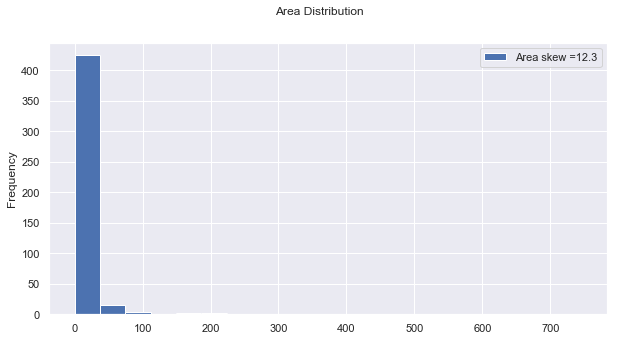

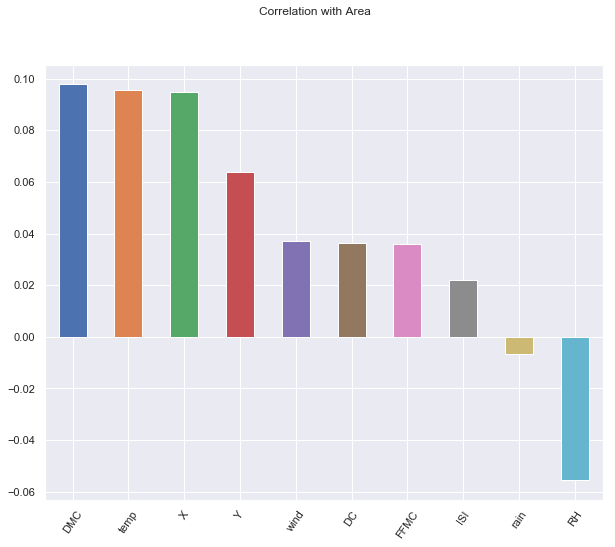

DMC     0.097792
temp    0.095625
X       0.094968
Y       0.063797
wind    0.037269
DC      0.036280
FFMC    0.035850
ISI     0.021936
rain   -0.006705
RH     -0.055384
Name: area, dtype: float64


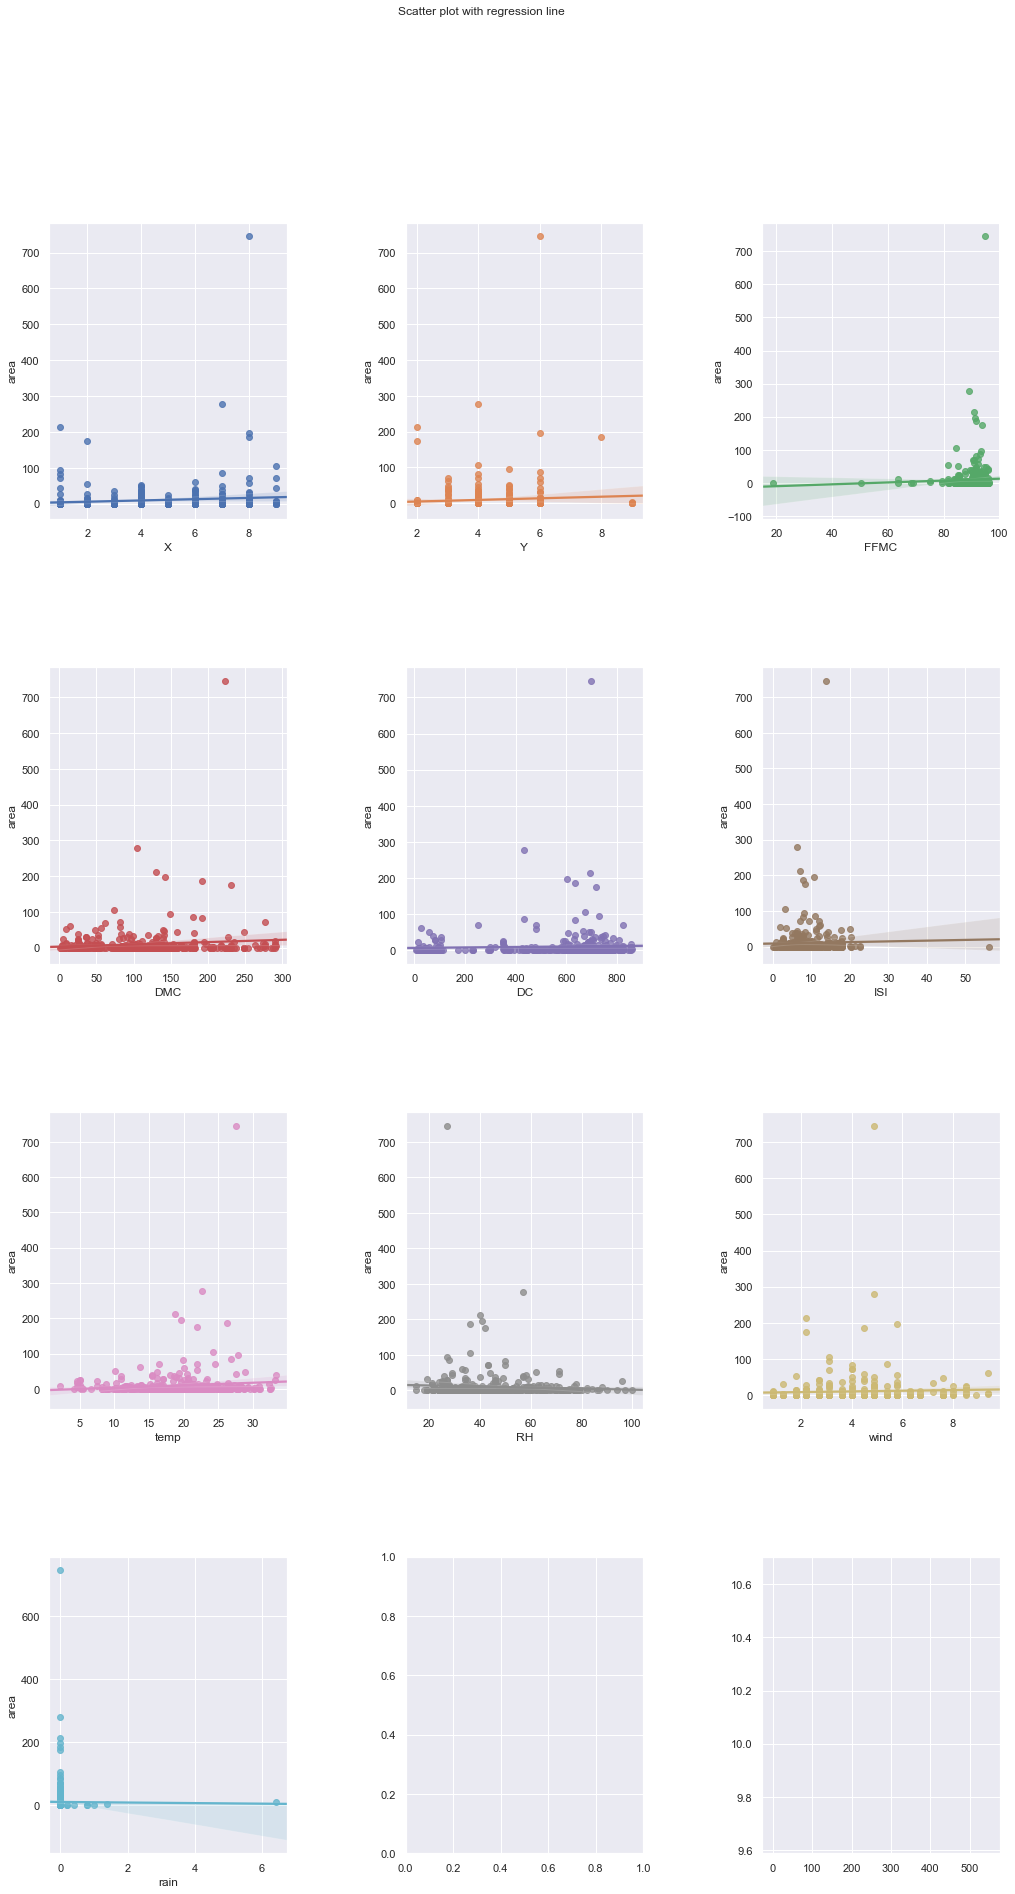

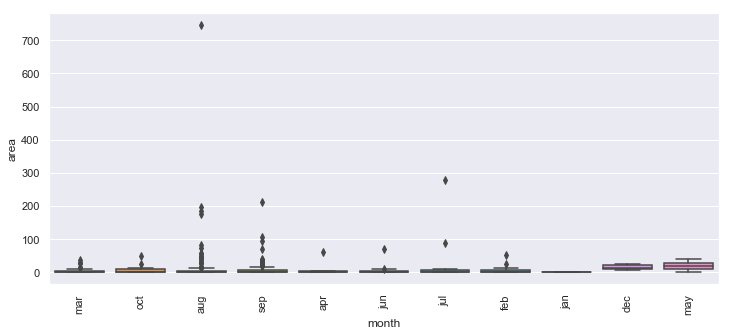

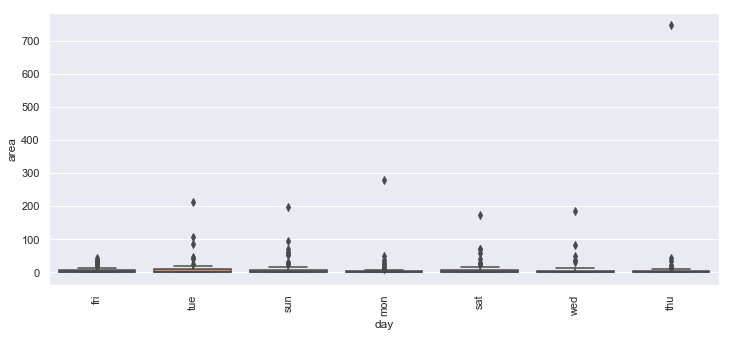

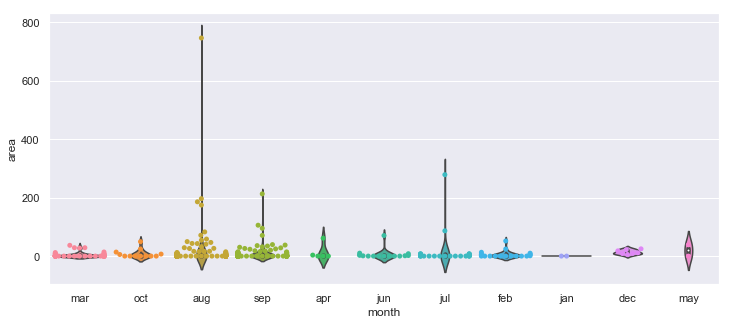

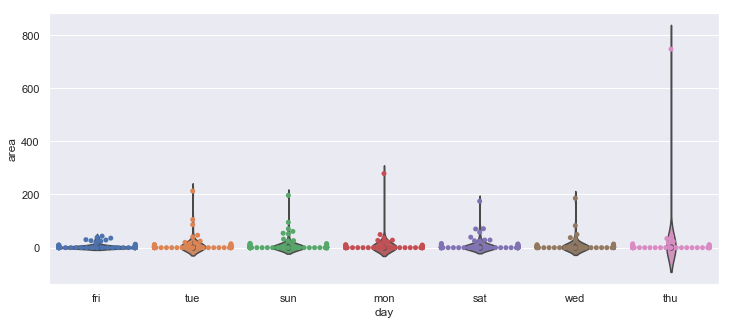

In [119]:
#distribution of area
skewness = df["area"].skew()
plt.figure(figsize = (10,5))
df["area"].plot.hist(edgecolor = 'white',bins = 20, label = 'Area skew ='+ str(round(skewness,2)))
plt.suptitle("Area Distribution")
plt.legend()
plt.show()



#correlation with Area
plt.figure(figsize = (10,8))
corr_with_area = df.corr()["area"].sort_values(ascending = False)
corr_with_area.drop(["area"]).plot.bar()
plt.xticks(rotation =55)
plt.suptitle('Correlation with Area')
plt.show()
print(corr_with_area.drop(["area"]).head(10))




#Regression plot with individual numeric_feature
fig, axs = plt.subplots(4,3, figsize=(16, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5, right=0.95)

axs = axs.ravel()

for ind, col in enumerate(numeric_features.drop([ "area"], axis = 1).columns):
        sns.regplot(numeric_features[col],df['area'], fit_reg = True, ax = axs[ind])
plt.suptitle('Scatter plot with regression line')
plt.show()

#Distribution with  categorical data
for col in categorical_features:
        plt.figure(figsize = (12,5))
        plt.xticks(rotation = 90)
        sns.boxplot(df[col],df['area'])
        plt.show()

#November is missing!

for col in categorical_features:
        plt.figure(figsize = (12,5))
        sns.violinplot(categorical_features[col], df['area'])
        sns.swarmplot(categorical_features[col], df['area'])
        plt.show()


## Univariate Analysis

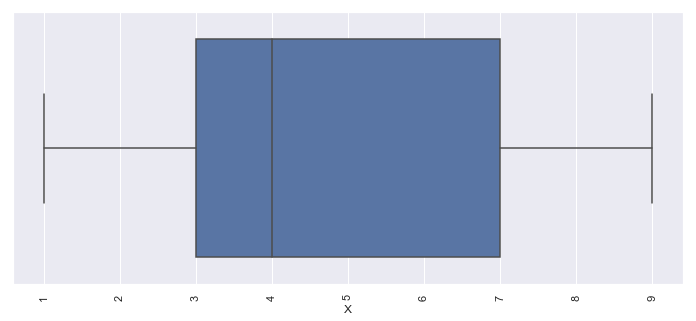

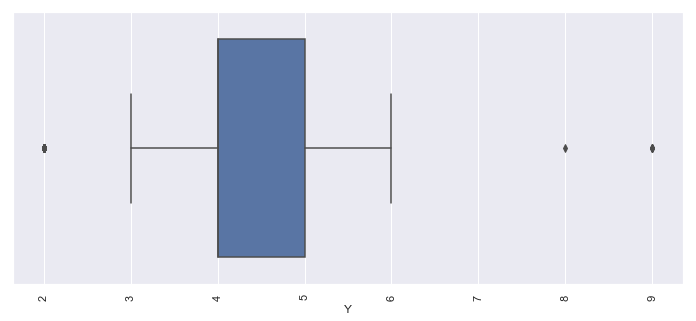

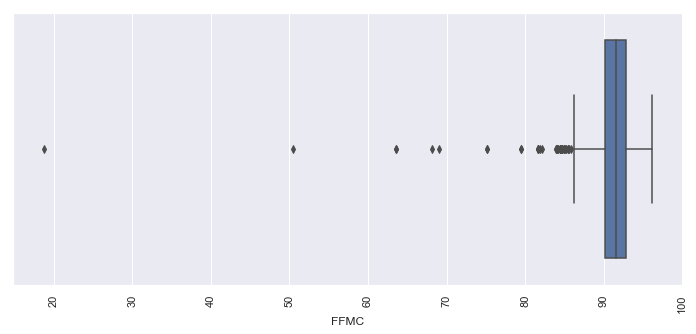

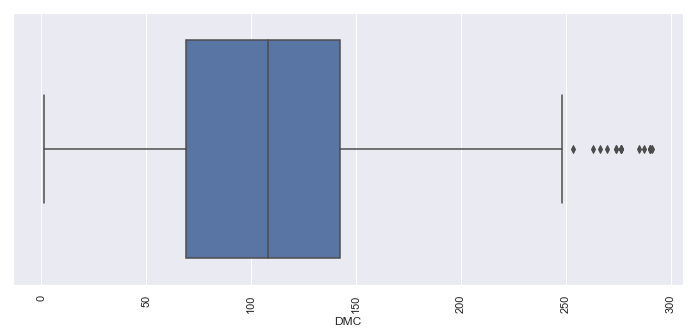

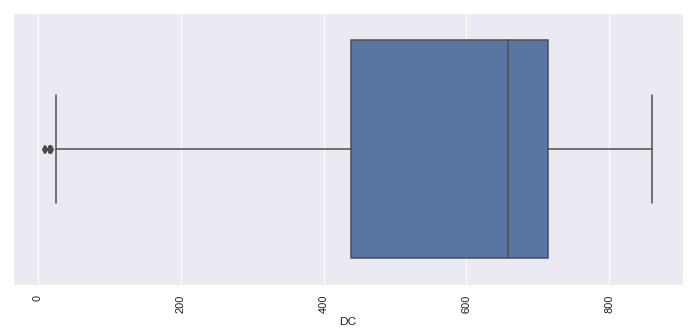

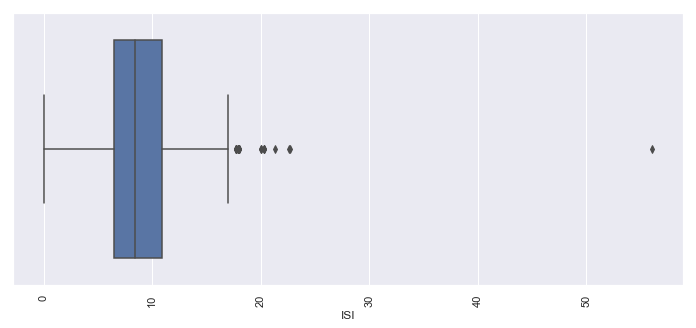

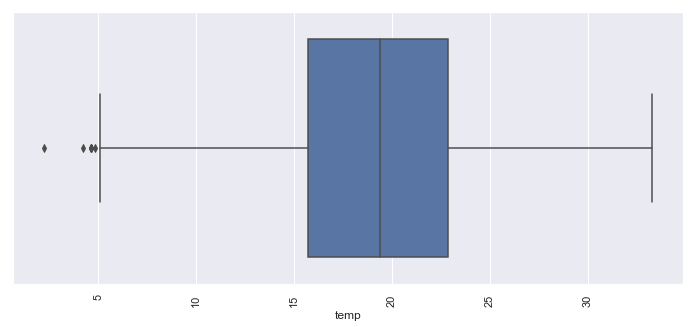

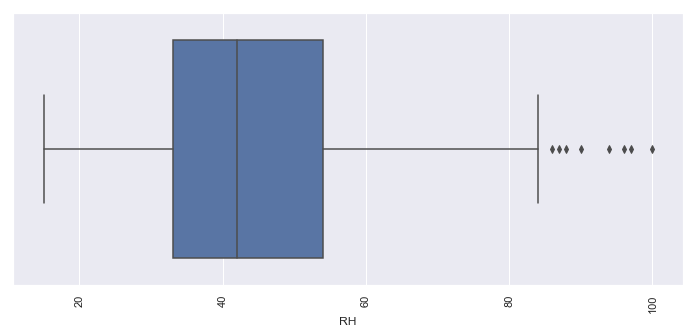

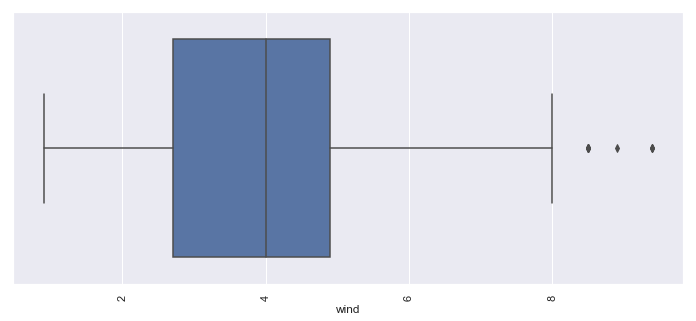

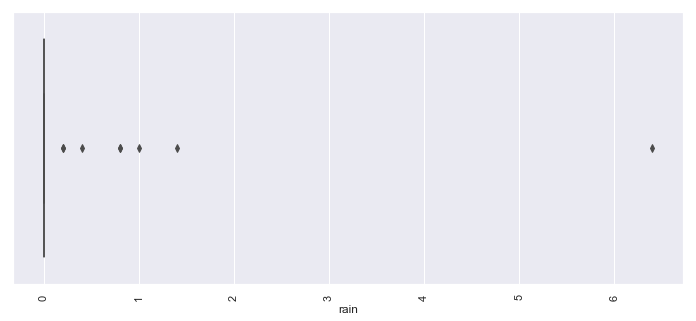

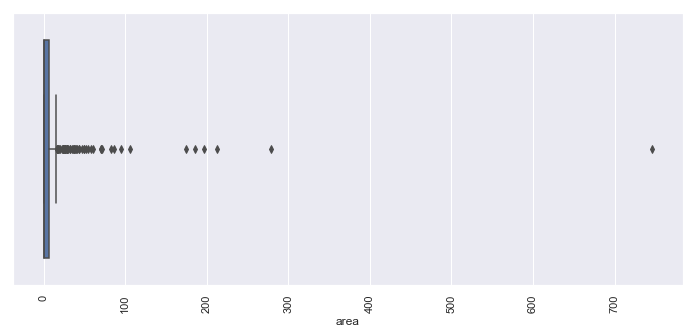

In [120]:
#Distribution with  numeric data
for col in numeric_features:
        plt.figure(figsize = (12,5))
        plt.xticks(rotation = 90)
        sns.boxplot(x=df[col])        
        plt.show()

rain    18.487393
area    12.302959
ISI      2.706510
RH       0.809478
DMC      0.564951
wind     0.563240
Y        0.400096
X        0.062860
temp    -0.316478
DC      -1.089400
FFMC    -6.956056
dtype: float64


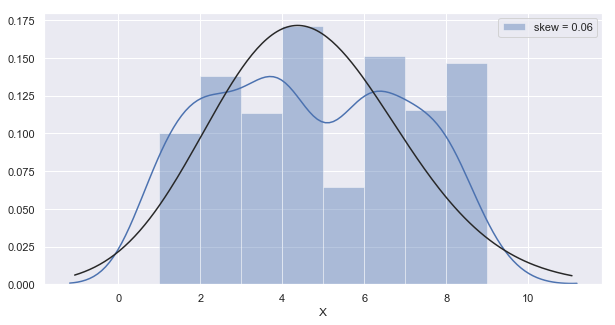

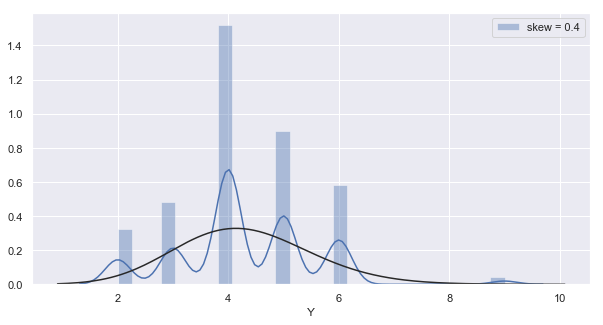

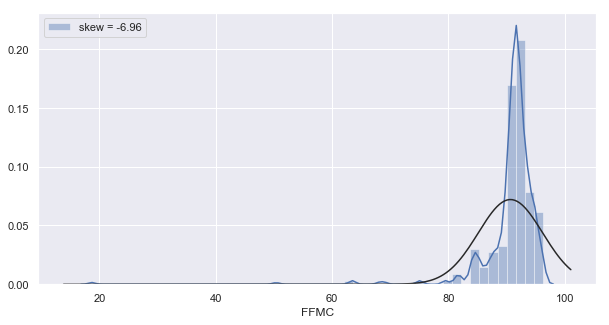

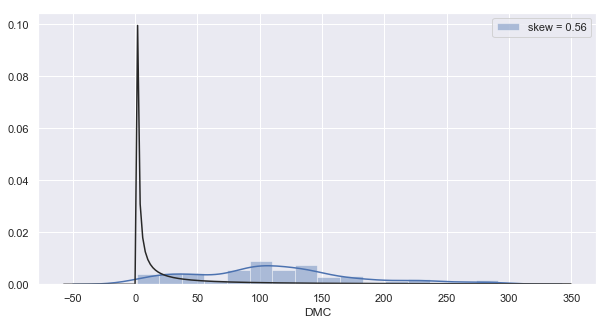

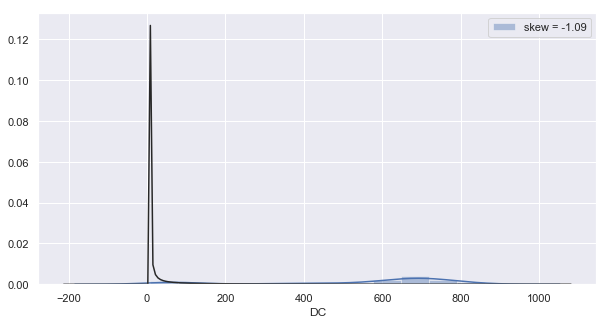

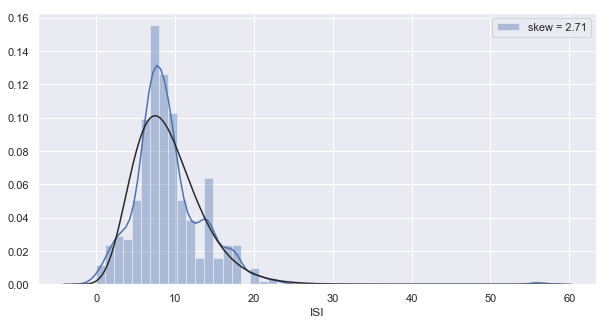

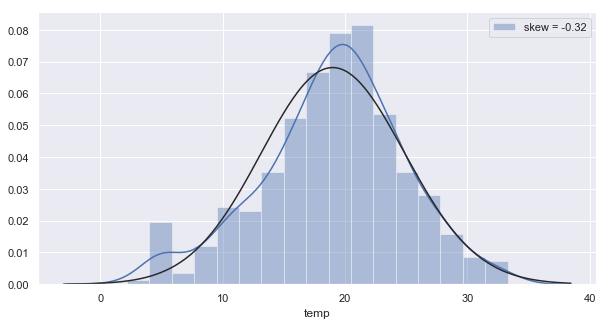

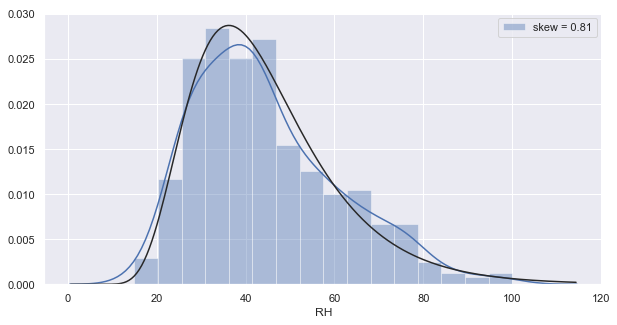

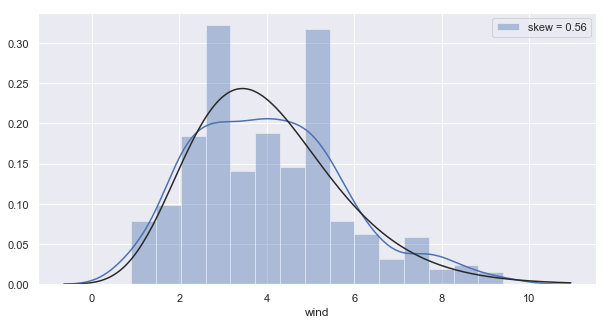

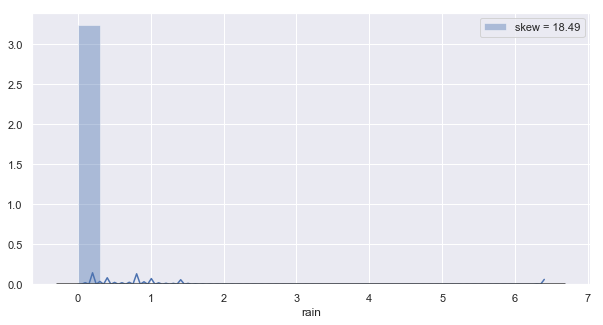

In [121]:
# distribution of Numeric Data
skews = numeric_features.skew()
print(skews.sort_values(ascending = False))

for col in numeric_features.drop(["area"], axis=1).columns.tolist():
        plt.figure(figsize = (10,5))
        sns.distplot(df[col],fit = stats.lognorm,label="skew = " + str(round(skews[col],2)) )
        plt.legend()
        plt.show()

log transformation required for +vely skwed features

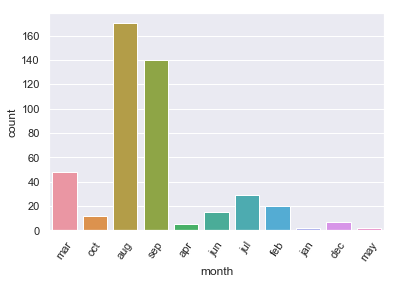

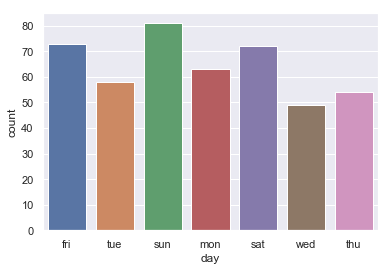

In [122]:
#Distribution of categorical data
plt.xticks(rotation = 55)
for col in categorical_features:
        sns.countplot(col, data = df)
        plt.show()



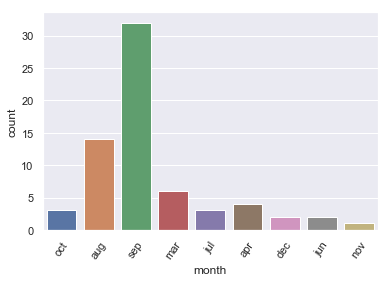

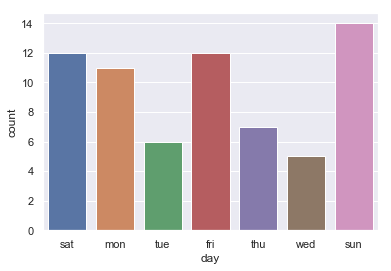

In [123]:
#Distribution of categorical data in Test set
plt.xticks(rotation = 55)
for col in categorical_features:
        sns.countplot(col, data = test)
        plt.show()

# Bivariate Analysis

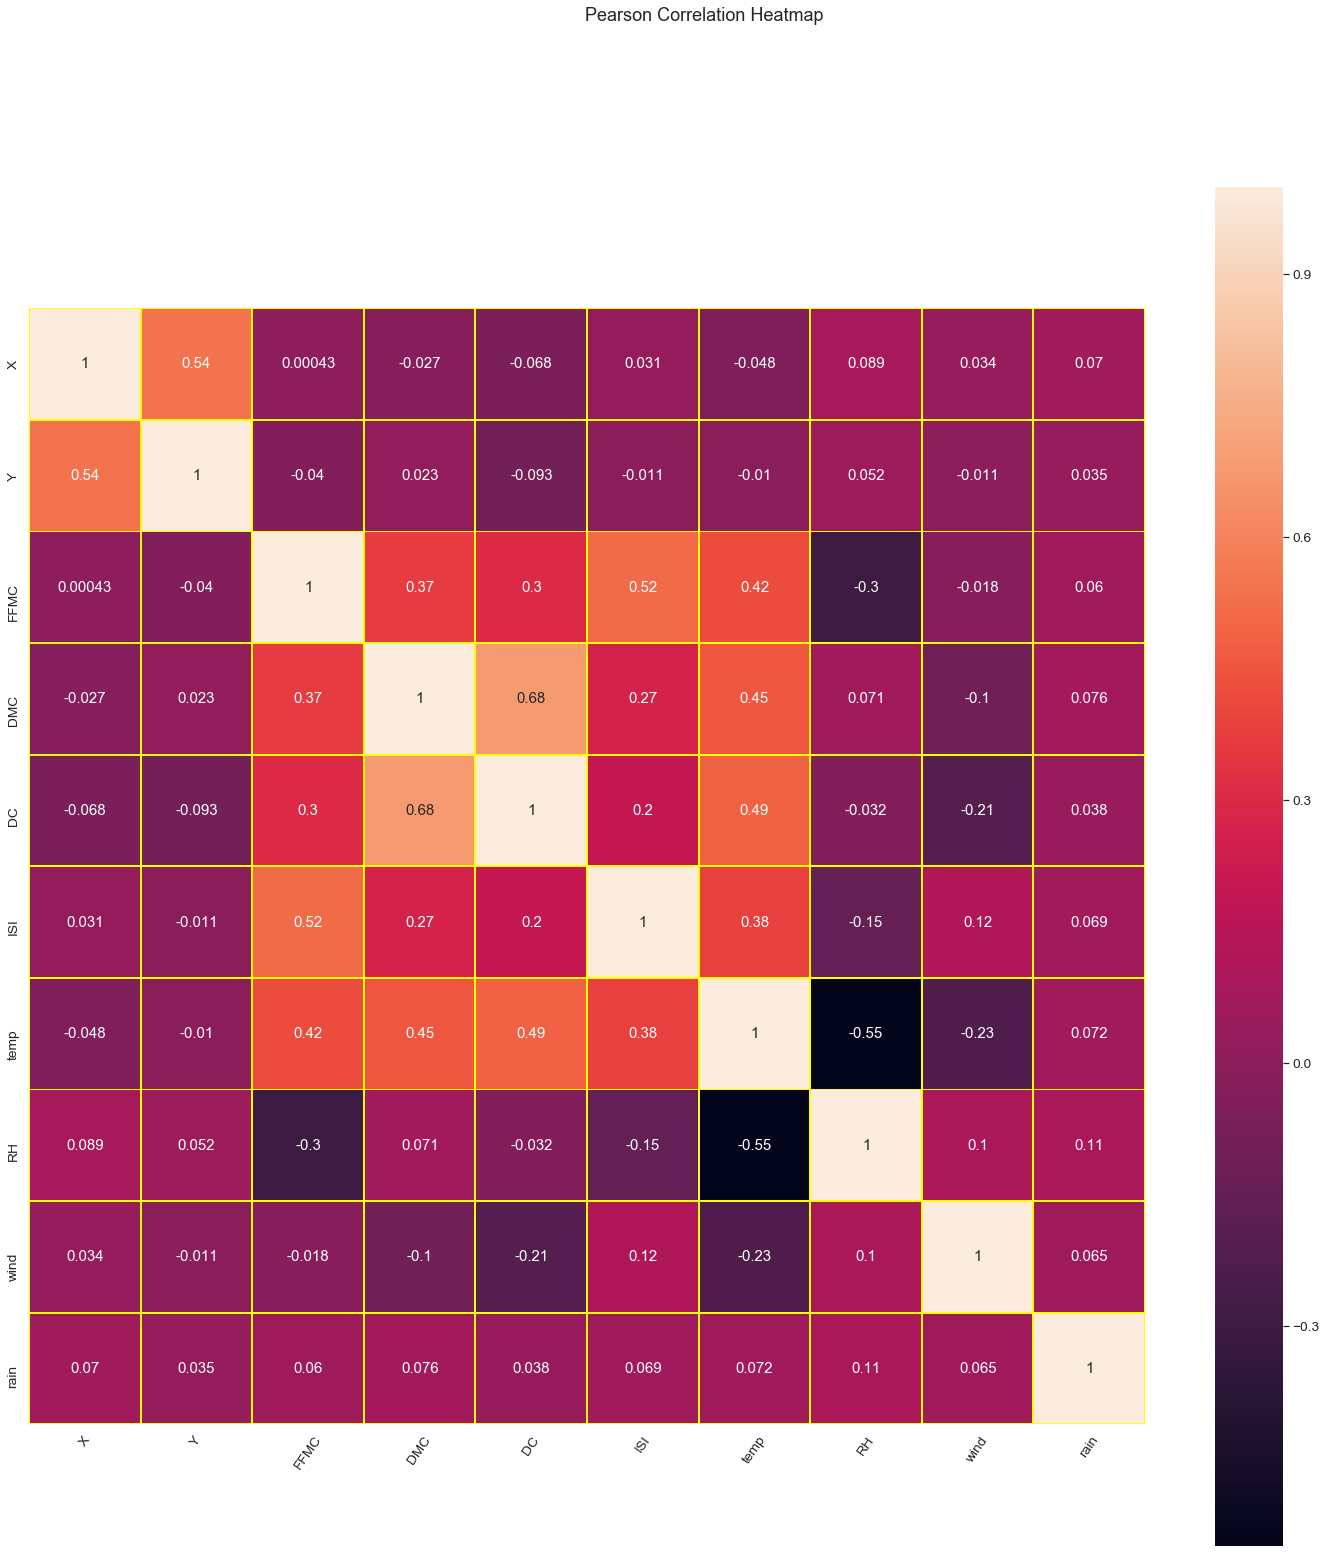

In [124]:
#Correlation matrix
plt.figure(figsize = (25,25))
sns.set(font_scale=1.25)
pd.set_option('precision', 2)
corrmat = df.drop(["area"], axis = 1).corr()
sns.heatmap(corrmat, annot=True,  linewidths=1, linecolor='yellow',square = True)
plt.suptitle("Pearson Correlation Heatmap")
plt.xticks(rotation = 55)
plt.show()

In [ ]:
#scatterplot 
sns.set()
sns.pairplot(df, size = 1.5)
plt.show();

# Handeling Categorical features

In [ ]:
X, y = df.drop(['area'], axis = 1), df['area']

print("X shape : ",X.shape, "\nX_test shape :",X_test.shape)
print("\nX :")
print(X.head(3))
print("\n\n\nX_test :")
print(X_test.head(3))

## Combining Test And Train set

In [ ]:
Dataset_X = pd.concat([X, X_test])
print(Dataset_X.shape)

# One Hot Encoding `day` and `month`

In [ ]:
#One Hot Encoding Day feature
day_dummies = pd.get_dummies(Dataset_X['day'], drop_first=True)
Dataset_X = pd.concat([Dataset_X, day_dummies], axis=1)
Dataset_X.drop(['day'], axis=1, inplace=True)
print(Dataset_X.shape)
print(Dataset_X.head(3))


#One Hot Encoding month feature
month_dummies = pd.get_dummies(Dataset_X['month'], drop_first=True)
Dataset_X = pd.concat([Dataset_X, month_dummies], axis=1)
Dataset_X.drop(['month'], axis=1, inplace=True)

print(Dataset_X.shape)
print(Dataset_X.head(3))

# Spliting into Train and Test set

In [ ]:
X = Dataset_X.iloc[:450, :]
X_test = Dataset_X.iloc[450:, :]

print("X shape :", X.shape)
print("X_test :", X_test.shape)

### spliting Train set into Train and Validate set

In [ ]:
#Splitting trainset into train and validation set 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.4, random_state = 9)
print("X_train shape :",X_train.shape,"\ny_train shape :" ,y_train.shape)
print("X_val shape :", X_val.shape,"\n" "y_val.shape :",y_val.shape)

### Modeling

In [ ]:
## Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_val)


print("Linear Regression")
pprint(lin_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## Decision Tree Regressor

deci_reg = DecisionTreeRegressor()
deci_reg.fit(X_train, y_train)
y_pred = deci_reg.predict(X_val)

print("\n\nDecision Tree Regressor :")
pprint(deci_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## Random Forest Regressor


rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_val)

print("\n\nRandom Forest Regressor :")

pprint(rf_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## SVR

l = [0.01, 0.1, 10, 100, 1000]
print("\n\nSVR :")
for c in l:
    svm_reg = SVR(C=c, kernel = 'rbf')
    svm_reg.fit(X_train, y_train)
    y_pred = svm_reg.predict(X_val)
    print("C = ", c)
    pprint(svm_reg.get_params())
    print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
    print("R2_score :\t\t", r2_score(y_val, y_pred))
    print('\n')

# Removing Outliers*

In [ ]:
df_mod = pd.concat([X, y], axis=1)
print(df_mod.shape)

In [ ]:
##DMC
df_mod = df_mod[np.abs(df_mod.DMC-df_mod.DMC.mean()) <= (2*df_mod.DMC.std())]
print(df_mod.shape)
plt.figure(figsize = (12,5))
plt.xticks(rotation = 90)
sns.boxplot(x=df_mod['DMC'])
plt.suptitle('DMC')
plt.show()

##Y
df_mod = df_mod[np.abs(df_mod.Y-df_mod.Y.mean()) <= (2*df_mod.Y.std())]
print(df_mod.shape)
plt.figure(figsize = (12,5))
plt.xticks(rotation = 90)
sns.boxplot(x=df_mod['Y'])        
plt.suptitle('Y')
plt.show()

##FFMC
df_mod = df_mod[np.abs(df_mod.FFMC-df_mod.FFMC.mean()) <= (1.5*df_mod.FFMC.std())]
print(df_mod.shape)
plt.figure(figsize = (12,5))
plt.xticks(rotation = 90)
sns.boxplot(x=df_mod['FFMC'])        
plt.show()

##DC
df_mod = df_mod[np.abs(df_mod.DC-df_mod.DC.mean()) <= (1.5*df_mod.DC.std())]
print(df_mod.shape)
plt.figure(figsize = (12,5))
plt.xticks(rotation = 90)
sns.boxplot(x=df_mod['DC'])        
plt.show()

##ISI
df_mod = df_mod[np.abs(df_mod.ISI-df_mod.ISI.mean()) <= (1.5*df_mod.ISI.std())]
print(df_mod.shape)
plt.figure(figsize = (12,5))
plt.xticks(rotation = 90)
sns.boxplot(x=df_mod['ISI'])        
plt.show()

##temp
df_mod = df_mod[np.abs(df_mod.temp-df_mod.temp.mean()) <= (2*df_mod.temp.std())]
print(df_mod.shape)
plt.figure(figsize = (12,5))
plt.xticks(rotation = 90)
sns.boxplot(x=df_mod['temp'])        
plt.show()

##RH
df_mod = df_mod[np.abs(df_mod.RH-df_mod.RH.mean()) <= (2*df_mod.RH.std())]
print(df_mod.shape)
plt.figure(figsize = (12,5))
plt.xticks(rotation = 90)
sns.boxplot(x=df_mod['RH'])        
plt.show()

##wind
df_mod = df_mod[np.abs(df_mod.wind-df_mod.wind.mean()) <= (2*df_mod.wind.std())]
print(df_mod.shape)
plt.figure(figsize = (12,5))
plt.xticks(rotation = 90)
sns.boxplot(x=df_mod['wind'])        
plt.show()

##area
df_mod = df_mod[np.abs(df_mod.area-df_mod.area.mean()) <= (1*df_mod.area.std())]
print(df_mod.shape)
plt.figure(figsize = (12,5))
plt.xticks(rotation = 90)
sns.boxplot(x=df_mod['area'])        
plt.show()

#### Scatter plot after removing outliers*

In [ ]:
fig, axs = plt.subplots(4,3, figsize=(16, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5, right=0.95)
axs = axs.ravel()
for ind, col in enumerate(numeric_features.drop([ "area"], axis = 1).columns):
        sns.regplot(df_mod[col],df_mod['area'], fit_reg = True, ax = axs[ind])

plt.show()

In [ ]:
X2, y2 = df_mod.drop(['area'], axis = 1), df_mod['area']
print(X2.shape)
X2.head(3)

#### Modelling

In [ ]:
#Splitting trainset into train and validation set 
X_train, X_val, y_train, y_val = train_test_split(X2, y2, test_size = 0.4, random_state = 9)

## Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_val)


print("Linear Regression :")
pprint(lin_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## Decision Tree Regressor

deci_reg = DecisionTreeRegressor()
deci_reg.fit(X_train, y_train)
y_pred = deci_reg.predict(X_val)

print("\n\nDecision Tree Regressor :")
pprint(deci_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## Random Forest Regressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_val)

print("\n\nRandom Forest Regressor :")
pprint(rf_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## SVR

l = [0.01, 0.1, 10, 100, 1000]
print("\n\nSVR :")
for c in l:
    svm_reg = SVR(C=c, kernel = 'rbf')
    svm_reg.fit(X_train, y_train)
    y_pred = svm_reg.predict(X_val)
    print("C = ", c)
    pprint(svm_reg.get_params())
    print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
    print("R2_score :\t\t", r2_score(y_val, y_pred))
    print('\n')

#### Submission  after removing outliers

In [ ]:
##Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X2, y2)
pred = lin_reg.predict(X_test)

ans = OrderedDict([('Id', Id), ('area',pred)])
submission = pd.DataFrame(ans)
submission.to_csv(r'C:\Users\MyPC\Documents\MACHINE LEARNING PROJECTS\machine-learning kaggle\AAVISHKAR_2018\Q2\submission3.csv', index=False)


##SVR
svm_reg = SVR(C=10, kernel = 'rbf')
svm_reg.fit(X2, y2)
pred = svm_reg.predict(X_test)


ans = OrderedDict([('Id', Id), ('area',pred)])
submission = pd.DataFrame(ans)
submission.to_csv(r'C:\Users\MyPC\Documents\MACHINE LEARNING PROJECTS\machine-learning kaggle\AAVISHKAR_2018\Q2\submission4.csv', index=False)

# Feature Scaling 

In [ ]:
cols = list(X2.columns)
print(cols)

In [ ]:
sc_X = StandardScaler()
X3 = sc_X.fit_transform(X2)
X_test3 = sc_X.transform(X_test)
X_test3 = pd.DataFrame(X_test3, columns=cols)
X3 = pd.DataFrame(X3,columns=cols)
y3 = y2

In [ ]:
# Skewness of Numeric Data
skews = X3.skew()
print(skews.sort_values(ascending = False))

#### Modelling

In [ ]:
#Splitting trainset into train and validation set 
X_train, X_val, y_train, y_val = train_test_split(X3, y3, test_size = 0.4, random_state = 9)

## Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_val)


print("Linear Regression :")
pprint(lin_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## Decision Tree Regressor

deci_reg = DecisionTreeRegressor()
deci_reg.fit(X_train, y_train)
y_pred = deci_reg.predict(X_val)

print("\n\nDecision Tree Regressor :")
pprint(deci_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## Random Forest Regressor


rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_val)

print("\n\nRandom Forest Regressor :")
pprint(rf_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## SVR

l = [0.01, 0.1, 10, 100, 1000]
print("\n\nSVR :")
for c in l:
    svm_reg = SVR(C=c, kernel = 'rbf')
    svm_reg.fit(X_train, y_train)
    y_pred = svm_reg.predict(X_val)
    print("C = ", c)
    pprint(svm_reg.get_params())
    print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
    print("R2_score :\t\t", r2_score(y_val, y_pred))
    print('\n')

In [ ]:
svm_reg = SVR(C=10, kernel = 'rbf')
svm_reg.fit(X3, y3)
pred = svm_reg.predict(X_test3)


ans = OrderedDict([('Id', Id), ('area',pred)])
submission = pd.DataFrame(ans)
submission.to_csv(r'C:\Users\MyPC\Documents\MACHINE LEARNING PROJECTS\machine-learning kaggle\AAVISHKAR_2018\Q2\submission5.csv', index=False)

# Feature Selection

In [ ]:
import statsmodels.formula.api as sm
# adding bias to the data set
bias = pd.DataFrame(np.ones((261,1)).astype(int))

X4 = pd.concat([bias, X3], axis=1)
y4 = y3

In [ ]:
X4_opt = np.array(X4)
y4 = np.array(y4)

In [ ]:
regressor_OLS = sm.OLS(endog=y4, exog=X4_opt).fit()
#significance level = 0.05
regressor_OLS.summary()

### Backward Elimination with p-values only

In [ ]:
def backwardElimination(x, y,sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    print(regressor_OLS.summary())
    return x
 
SL = 0.05
X_Modeled = backwardElimination(X4_opt, y4, SL)

In [ ]:
X_Modeled.shape

In [ ]:
X_Modeled = pd.DataFrame(X_Modeled)
X_Modeled.shape

In [ ]:
X_Modeled.head(5)

### Modelling

In [ ]:
#Splitting trainset into train and validation set 
X_train, X_val, y_train, y_val = train_test_split(X_Modeled, y4, test_size = 0.4, random_state = 0)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_val)

##Linear Regression 
print("Linear Regression :")
pprint(lin_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## Decision Tree Regressor

deci_reg = DecisionTreeRegressor()
deci_reg.fit(X_train, y_train)
y_pred = deci_reg.predict(X_val)

print("\n\nDecision Tree Regressor :")
pprint(deci_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## Random Forest Regressor


rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_val)

print("\n\nRandom Forest Regressor :")
pprint(rf_reg.get_params())
print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))

## SVR

l = [0.01, 0.1, 10, 100, 1000]
print("\n\nSVR :")
for c in l:
    svm_reg = SVR(C=c, kernel = 'rbf')
    svm_reg.fit(X_train, y_train)
    y_pred = svm_reg.predict(X_val)
    print("C = ", c, "\tKernal : rbf")
    pprint(svm_reg.get_params())
    print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
    print("R2_score :\t\t", r2_score(y_val, y_pred))
    print('\n')
for c in l:
    svm_reg = SVR(C=c, kernel = 'linear')
    svm_reg.fit(X_train, y_train)
    y_pred = svm_reg.predict(X_val)
    print("C = ", c, "\tKernal : linear")
    pprint(svm_reg.get_params())
    print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
    print("R2_score :\t\t", r2_score(y_val, y_pred))
    print('\n')

for c in l:
    svm_reg = SVR(C=c, kernel = 'poly')
    svm_reg.fit(X_train, y_train)
    y_pred = svm_reg.predict(X_val)
    print("C = ", c, "\tKernal : poly")
    pprint(svm_reg.get_params())
    print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
    print("R2_score :\t\t", r2_score(y_val, y_pred))
    print('\n')

### Submission after Backward Elimination

In [ ]:
# predicting on test set
bias = pd.DataFrame(np.ones((67,1)).astype(int))
X_test_Modeled = pd.concat([bias, X_test3], axis=1)
print(X_test_Modeled.shape)


lin_reg = LinearRegression()
lin_reg.fit(X_Modeled, y4)

pred = lin_reg.predict(X_test_Modeled.iloc[:,:2])

ans = OrderedDict([('Id', Id), ('area',pred)])
submission = pd.DataFrame(ans)
submission.to_csv(r'C:\Users\MyPC\Documents\MACHINE LEARNING PROJECTS\machine-learning kaggle\AAVISHKAR_2018\Q2\submission66.csv', index=False)

# Neural Network

In [ ]:
X5 = X3
y5 = y3

In [ ]:
y5 = y5.astype('int')

In [ ]:
X5.shape, y5.shape

#Splitting trainset into train and validation set 
X_train, X_val, y_train, y_val = train_test_split(X5, y5, test_size = 0.4, random_state = 9)

from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(27,27,27,27,27,27))
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_val)

print("Root Mean Squared Error :",np.sqrt(MSE(y_val, y_pred)))
print("R2_score :\t\t", r2_score(y_val, y_pred))
pprint(mlp.get_params())